- 서울의 연도별 분양가격 추이(선그래프)
- 지역별 분양가격 (막대그래프 수직/수평)
- 분양가격 히스토그램, 커널밀도, 박스플롯
- 월별 분양가격(선그래프)

In [1]:
import pandas as pd
df = pd.read_csv('C:/python/data/주택도시보증공사_전국 신규 민간 아파트 분양가격 동향_20200331.csv', encoding='ms949')
df.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [3]:
import matplotlib.pyplot as plt
# jupyter화면을 출력
%matplotlib inline 
# 한글처리
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font)

In [4]:
df = df.dropna()
df = df.rename(columns={'분양가격(㎡)':'분양가격'})
# 공백제거
df['분양가격']=df['분양가격'].str.strip()
df = df.drop(df.loc[df['분양가격']==''].index)
df['분양가격'] = df['분양가격'].astype(int)

In [5]:
df['규모구분'] = df['규모구분'].str.replace('전용면적 ','')

In [6]:
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,60㎡이하,2015,10,5652
2,서울,60㎡초과 85㎡이하,2015,10,5882
3,서울,85㎡초과 102㎡이하,2015,10,5721
4,서울,102㎡초과,2015,10,5879


In [7]:
# 서울의 연도별 분양가격 추이(선그래프)
df.loc[df['지역명']=='서울'].groupby('연도')['분양가격'].mean()

연도
2015    6156.266667
2016    6591.950000
2017    6625.483333
2018    7030.983333
2019    8571.766667
2020    9390.933333
Name: 분양가격, dtype: float64

<AxesSubplot:xlabel='연도'>

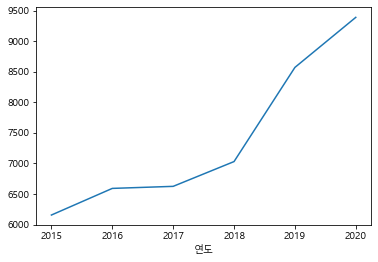

In [8]:
df.loc[df['지역명']=='서울'].groupby('연도')['분양가격'].mean().plot()

<AxesSubplot:xlabel='연도'>

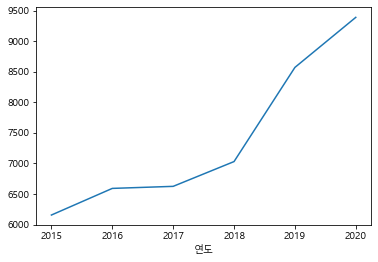

In [9]:
df_seoul = df.loc[df['지역명']=='서울']
df_seoul_group = df_seoul.groupby('연도')
df_seoul_group_price_mean = df_seoul_group['분양가격'].mean()
df_seoul_group_price_mean.plot()

<AxesSubplot:xlabel='지역명'>

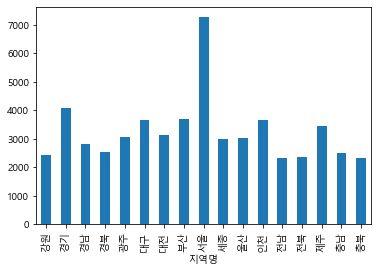

In [11]:
# 지역별 분양가격(평균) (막대그래프 수직/수평)
df.groupby('지역명')['분양가격'].mean().plot(kind='bar')

<AxesSubplot:ylabel='지역명'>

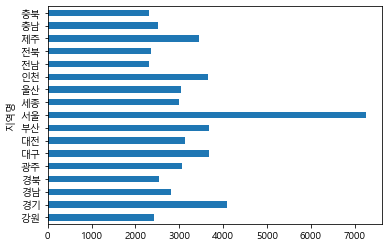

In [12]:
df.groupby('지역명')['분양가격'].mean().plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

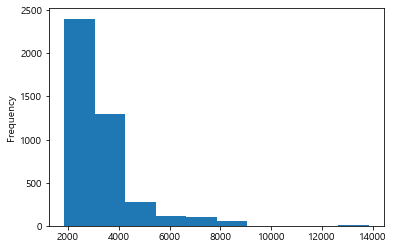

In [13]:
# 분양가격 히스토그램, 커널밀도, 박스플롯
df['분양가격'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

C:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


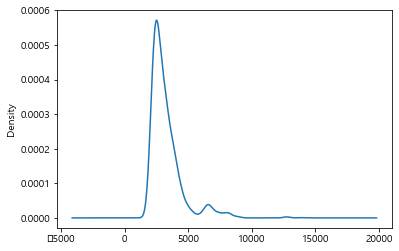

In [14]:
df['분양가격'].plot(kind='kde')

<AxesSubplot:xlabel='분양가격', ylabel='연도'>

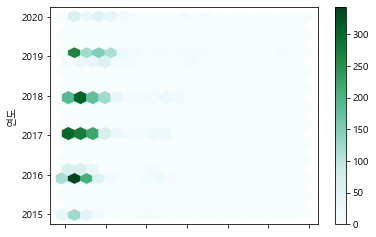

In [15]:
# 고밀도 산점도그래프
df.plot(kind='hexbin', x='분양가격',y='연도', gridsize=20)

<AxesSubplot:>

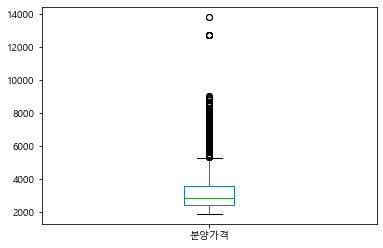

In [16]:
# 박스플롯
df['분양가격'].plot(kind='box')

<AxesSubplot:xlabel='월'>

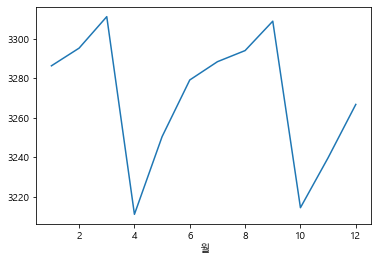

In [25]:
# 월별 분양가격(선그래프)
df.groupby('월')['분양가격'].mean().plot()